# `Matplotlib` 

## О библиотеке `Matplotlib`

`Matplotlib` является сторонней библиотекой для `python`, но как и `NumPy` входит в дистрибутив `Anaconda`. Установить его с помощью `PyPI` можно следующей командой.

```sh
python -m pip install matplotlib
```

Построение графиков в минималистичном варианте в `Matplotlib` осуществляется довольно просто: чтобы построить самый простой график, достаточно нескольких строк кода. Ниже приводится [пример минимального исходного кода](https://matplotlib.org/stable/users/getting_started/index.html#draw-a-first-plot) из документации и генерируемый ей график. При этом первые 4 из 7 строк этого кода импортируют библиотеки и генерируют данные для построения графиков и лишь три последние строки кода отвечают за построение графика.

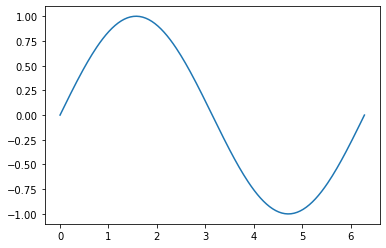

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2 * np.pi, 200)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

Для построения графиков на плоскости (2D) в подавляющем большинстве случае из `Matplotlib` достаточно импортировать подмодуль  [pyplot](https://matplotlib.org/stable/api/pyplot_summary.html). При этом этот подмодуль используется настолько повсеместно, что сформировался общепринятый псевдоним `plt` для `pyplot`, т.е. очень часто встречаются импорты вида
```python
from matplotlib import pyplot as plt
```
или 
```python
import matplotlib.pyplot as plt
```

Кроме `pyplot` в `Matplotlib` есть огромное количество других подмодулей, непосредственное использование которых встречается гораздо реже. С полным списком можно ознакомиться [в документации](https://matplotlib.org/stable/api/). Упомянем здесь только инструментарий [mpl_toolkit.mplot3d](https://matplotlib.org/stable/api/toolkits/mplot3d.html), который может пригодиться при построении трехмерных графиков. 

## Иерархическая структура графиков в `Matplotlib`

Работать с `Matplotlib` гораздо проще, если понимать из каких объектов состоят графики `Matplotlib`, и какая между ними есть иерархия. Важно выделить 3 основных типа объектов: [figure](https://matplotlib.org/stable/api/figure_api.html), [axes](https://matplotlib.org/stable/api/axes_api.html) и [artist](https://matplotlib.org/stable/api/artist_api.html).

```{figure} /_static/lecture_specific/visualization/hierarchy.svg
```

Рисунок выше иллюстрирует иерархию между ними.
1. Наверху иерархии находится `Figure`, внутри которой происходит отрисовка всех остальных объектов. Фигура может принимать разную форму: в обычных скриптах эта фигура выводится в отдельном окне или встраивается в уже существующее пользовательское приложение с графическим интерфейсом, в блокнотах `jupyter` фигуры автоматически встраиваются в вывод ячейки.
2. Внутри `Figure` в произвольных позициях может быть произвольное количество объектов `Axes`, каждый из которых задаёт локальную систему координат для отображения графических объектов, а также отвечает за отображения координатных осей этой системы координат. `Axes` бывают разных типов: от самых стандартных декартовых или полярных координат на плоскости до трехмерных координатных систем или даже географических.
3. Внутри системы координат любой из `Axes` можно построить произвольное количество объектов `Artist`, каждый из который представляет графический элемент на графике, такой, как, например, кривая на плоскости или в пространстве, поверхность в пространстве, текст, геометрический примитив и т.д.

Если держать эту иерархию в голове, то легко понять какой объект за что отвечает и методы какого объекта необходимо вызывать, чтобы добиться требуемых изменений.  


Код в ячейке ниже демонстрирует объекты всех трех типов:
1. Имя `fig` связано с объектом типа `Figure`;
2. Имена `left_axes` и `right_axes` связаны с объектами типа `Axes`;
3. Имена `line_2D` и `line_2D` связаны с объектами типа `Artist`, а более конкретно, с объектами типа `Line`. 

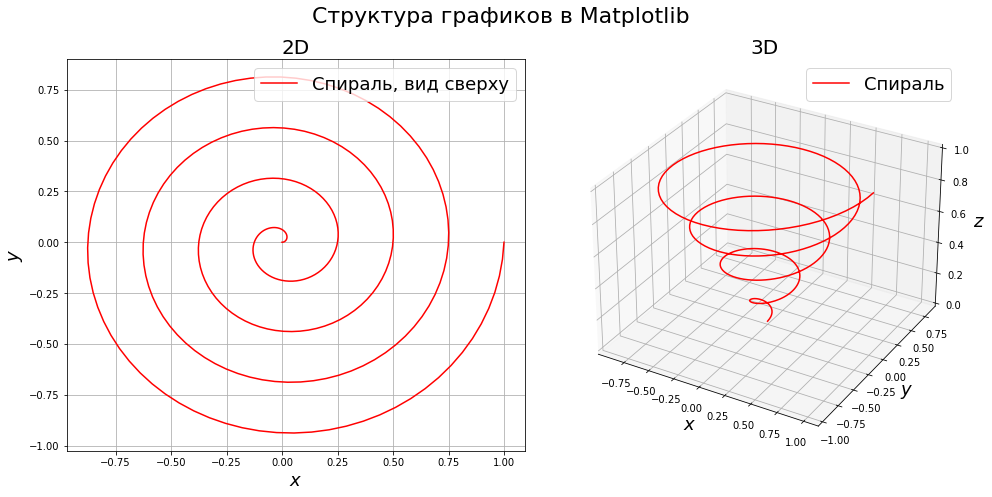

In [3]:
import numpy as np
from matplotlib import pyplot as plt

# генерация данных
omega = 8 * np.pi
t = np.linspace(0, 1, 300)
x = t * np.cos(omega * t)
y = t * np.sin(omega * t)
z = t

# параметры
small_fontsize = 18
medium_fontsize = 20
large_fontsize = 22


# создание `figure`
fig =  plt.figure(figsize=(14, 7))

# настройка `figure`
fig.suptitle("Структура графиков в Matplotlib", size=large_fontsize)
fig.set_tight_layout(True)

# создание `axes` на левой половине  и правой половине `figure`
left_axes = fig.add_subplot(1, 2, 1)
right_axes = fig.add_subplot(1, 2, 2, projection="3d")

# построение и настройка графика в `axes` на левой половине `figure`
line_2D,  = left_axes.plot(x, y)
line_2D.set_label("Спираль, вид сверху")
line_2D.set_color("red")

# настройка `axes` в левой половине `figure`
left_axes.xaxis.set_label_text("$x$", size=small_fontsize)
left_axes.yaxis.set_label_text("$y$", size=small_fontsize)
left_axes.set_title("2D", size=medium_fontsize)
left_axes.legend(fontsize=small_fontsize)
left_axes.grid()

# построение и настройка графика в `axes` на правой половине `figure`
line_3D, = right_axes.plot(x, y, z)
line_3D.set_label("Спираль")
line_3D.set_color("red")

# настройка `axes` в левой половине `figure`
right_axes.xaxis.set_label_text("$x$", size=small_fontsize)
right_axes.yaxis.set_label_text("$y$", size=small_fontsize)
right_axes.zaxis.set_label_text("$z$", size=small_fontsize)
right_axes.set_title("3D", size=medium_fontsize)
right_axes.legend(fontsize=small_fontsize)

## Как строить графики 

### Стиль программирования 

Прежде всего стоит отметить, то что `Matplotlib` [поддерживает построение графиков в двух стилях программирования](https://matplotlib.org/stable/tutorials/introductory/usage.html#coding-styles). 

Первый из них черпает вдохновение из математического пакета `matlab`. При таком подходе программист возлагает создание и управление всеми фигурами и осями на библиотеку `Matplotlib`. Такой подход можно назвать **неявным** и разработчики библиотеки **не** рекомендуют прибегать к нему при построении хоть сколько-нибудь сложных графиков. Тем не менее в документации встречаются примеры, написанные в таком стиле, поэтому полезно иметь представление о существовании такого стиля.

Ниже приводится создания графика в таком стиле. Обратите внимание, что все методы при таком подходе вызываются напрямую от `plt`, а библиотека `Matplotlib` сама следит за тем, какая фигура и какие оси были созданы (или активированы в общем случае) последними.  

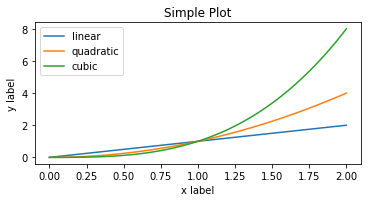

In [2]:
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(0, 2, 100)  # Sample data.

plt.figure(figsize=(5, 2.7), layout='constrained')
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

Второй стиль называют объектно-ориентированным, так как он подразумевает создание в явном виде объектов фигур и осей и последующее использование этих объектов для совершения связанных с ними операций, таких как, например, построение графиков в них. Такой подход как правило приводит к гораздо более читабельному, гибкому и прозрачному коду, т.к. все операции совершаются в явном виде. 

В ячейке ниже находится исходных код из примера выше, но переделанный под объектно-ориентированный стиль. Обратите внимание, что почти все методы вызываются не от `plt`, а объекта `ax`, который соответствует конкретным заранее созданным осям.

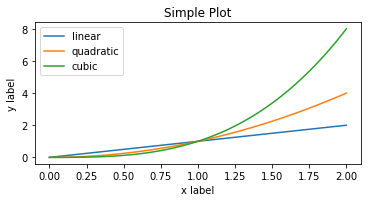

In [3]:
x = np.linspace(0, 2, 100)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend();  # Add a legend.

Автор курса рекомендует прибегать именно к объектно-ориентированному подходу.

### 1 `Figure` - 1 `Axes`

Начнем с ситуации попроще, когда для визуализации данных хватает одного `Axes`. В таком случае проще всего воспользоваться методом [subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html?highlight=subplots#matplotlib.pyplot.subplots), который по-умолчанию создают фигуру с одними осями и возвращает ссылки на них.

Удобно сразу же указать и размер требуемой фигуры параметром `figsize`. Ниже создаётся фигура с осями по этому рецепту.

```{tip}
По умолчанию на фигуре остаются небольшие поля, т.е. оси занимают не все пространство на фигуре. Автор курса почти всегда передаёт строку `"tight"` в качестве параметра `layout`, чтобы максимально эффективно использовать пространство фигуры.  
```

<class 'matplotlib.figure.Figure'> <class 'matplotlib.axes._subplots.AxesSubplot'>


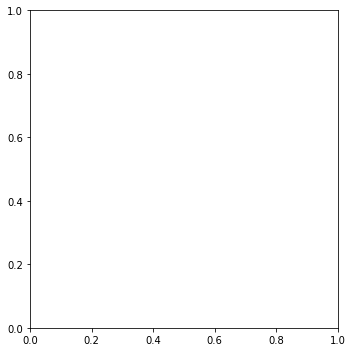

In [13]:
fig, ax = plt.subplots(figsize=(5, 5), layout="tight")
print(type(fig), type(ax))

Важно понимать, что нельзя поменять вид осей, когда они уже созданы, т.е. если нужны полярные или трехмерные оси, то необходимо указать это на этапе их создания. В методе `subplots` за это отвечает параметр `subplot_kw`, который принимает словарь параметров и применяет эти параметры при создании осей внутри фигуры. За тип осей отвечает параметр `projection`, который может принимать следующие значения.
| `projection` | вид системы координат |
|---|---|
| `"rectilinear"`   | Декартова прямоугольная система координат на плоскости (значение по умолчанию). |
| `"polar"` | Полярная система координат   |
|  `"3d"` | Прямоугольная система координат в трехмерном пространстве |

```{note}
Ниже будет показано, что этим же методом `subplots` удобно создавать таблицу осей внутри фигуры. Параметр `subplot_kw` используется при создании всех осей внутри одной фигуры, а значит таким подходом не выйдет на одной фигуре создать набор осей разного вида. В таком случае нет ничего лучше, чем использовать метод [add_subplot](https://matplotlib.org/stable/api/figure_api.html?highlight=add_subplot#matplotlib.figure.Figure.add_subplot).
```

<class 'matplotlib.axes._subplots.AxesSubplot'> <class 'matplotlib.axes._subplots.PolarAxesSubplot'> <class 'matplotlib.axes._subplots.Axes3DSubplot'>
True True True


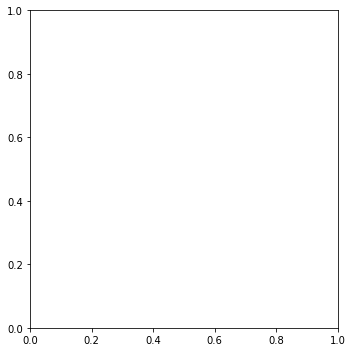

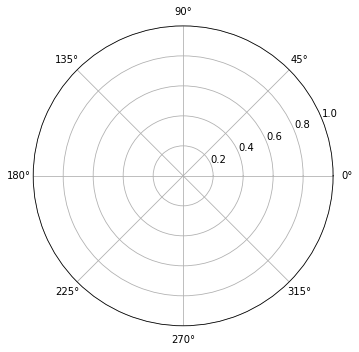

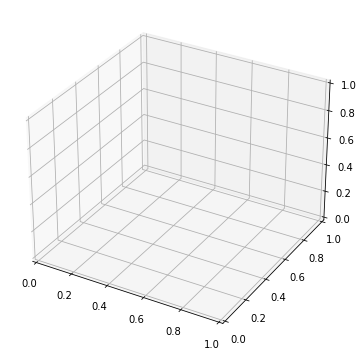

In [18]:
fig1, ax1 = plt.subplots(figsize=(5, 5), layout="tight", subplot_kw={"projection": "rectilinear"})
fig2, ax2 = plt.subplots(figsize=(5, 5), layout="tight", subplot_kw={"projection": "polar"})
fig3, ax3 = plt.subplots(figsize=(5, 5), layout="tight", subplot_kw={"projection": "3d"})

print(type(ax1), type(ax2), type(ax3))
print(isinstance(ax1, plt.Axes), isinstance(ax2, plt.Axes), isinstance(ax3, plt.Axes))

Когда оси созданы, можно на них рисовать. Тип доступных графиков определяется типом осей, т.е. на плоских осях не выйдет рисовать трехмерные графики и т.п. Чтобы построить график в нужных осях, необходимо просто вызывать правильный метод от объекта этих осей.

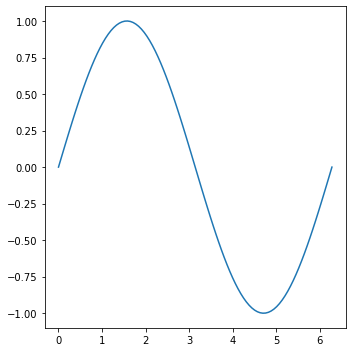

In [10]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

fig, ax = plt.subplots(figsize=(5, 5), layout="tight")
ax.plot(x, y)

Каждый вызов такого метода добавляет одного или несколько `artist` на оси, кортеж ссылок на которые он возвращает вызывающему коду. Далее эти ссылки могут быть использованы для изменения графического элемента. Ниже демонстрируется такая возможность: сначала создаётся линейный график функции $y = \sin(x)$, а затем у объекта созданной линии подменяются $y$ координаты на уполовиненные прежние.  

```{tip}
Можно добавлять произвольное количество элементов на график.
```

<class 'matplotlib.lines.Line2D'> True


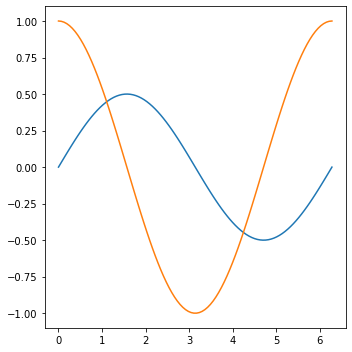

In [19]:
x = np.linspace(0, 2*np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

fig, ax = plt.subplots(figsize=(5, 5), layout="tight")
sinusoid, cosinusoid = ax.plot(x, y1, x, y2)
sinusoid.set_ydata(0.5*sinusoid.get_ydata())

print(type(sinusoid), isinstance(sinusoid, plt.Artist))

Тем не менее обычно гораздо удобнее сразу создать графический элемент в нужном виде. Поэтому создание ссылок на объекты типа `Artist` встречается гораздо реже, чем на объекты типа `Axes` и `Figure`.

### 1 `Figure` - N `Axes`

В `Matplotlib` предусмотрено несколько путей, чтобы создавать несколько осей внутри одной фигуры. Подробно почитать об этом в документации можно [по ссылке](https://matplotlib.org/stable/tutorials/intermediate/arranging_axes.html#sphx-glr-tutorials-intermediate-arranging-axes-py). В большинстве ситуаций хватает все того же метода `subplots`.

Метод `subplots` позволяет создавать фигуры с как-бы таблицей из осей. За количество строк и столбцов таблицы отвечают параметры `nrows` (**n**umber of **rows**) и `ncols` (**n**umber of **col**umn**s**) соответственно. В ячейке ниже создаётся фигура с 6 осями внутри неё в виде таблицы из двух строк и трех столбцов.

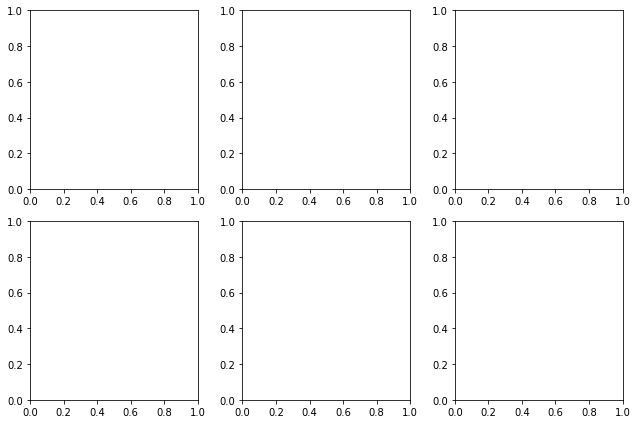

In [12]:
fig, axs = plt.subplots(figsize=(9, 6), nrows=2, ncols=3, layout="tight")

Если создаётся больше одних осей, то вторым значением `subplots` возвращает сразу `NumPy` массив объектов `Axes` формы, совпадающей с формой таблицы.

In [18]:
print(f"{type(axs)=}")
print(f"{axs.shape=}")

type(axs)=<class 'numpy.ndarray'>
axs.shape=(2, 3)


Элементы этого массива далее и используется для построения графика в нужных осях.

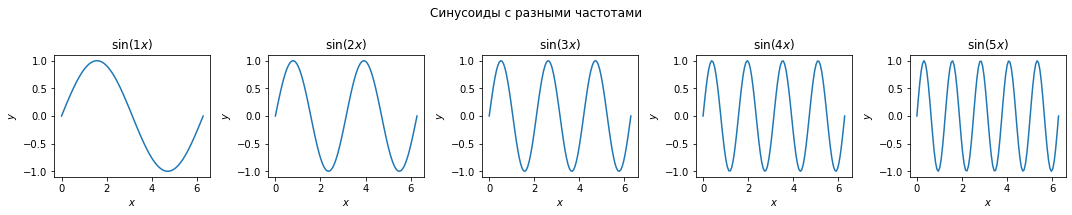

In [4]:
x = np.linspace(0, 2*np.pi, 100)
ncols = 5

fig, axs = plt.subplots(figsize=(3*ncols, 3), ncols=ncols, layout="tight")
fig.suptitle("Синусоиды с разными частотами")
for i in range(ncols):
    k = i + 1
    y = np.sin(k * x)
    axs[i].plot(x, y)
    axs[i].set_title(fr"$\sin({k}x)$")
    axs[i].set_xlabel(r"$x$")
    axs[i].set_ylabel(r"$y$")